<a href="https://colab.research.google.com/github/arkham7638/Land-price-prediction-Delhi-/blob/main/land_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Land Price Prediction With Deployment*

The project deals with the deployment and as well as the pediction of the price of the land along U.I so that the user may interact with the design.
The programming language we will be using python to be exact.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [4]:
# Import files from the device
from google.colab import files
uploaded = files.upload()

Saving Delhi.csv to Delhi.csv


# *Reading The Data-Set*

In [5]:
# Reading the data from the csv file
df1 = pd.read_csv("Delhi.csv")

df1.head(6)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,15800000,1800,Sector 7 Dwarka,4,1,0,1,1,0,1,1,0,0,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0


In [6]:
# Getting the shape of the data 
df1.shape

(4998, 40)

In [7]:
# Get the basic description of the data 
df1.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,4.998000e+03,4998.000000,4998.000000,4998.00000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.00000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.00000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,1.588638e+07,1277.343737,2.657863,0.80012,5.423770,5.472589,5.415966,5.435574,5.412765,5.437975,5.398359,5.398960,5.570228,5.487795,5.39916,5.460184,5.399560,5.423770,5.530812,5.490996,5.407163,5.399360,5.402961,5.39916,5.408363,5.562225,5.426971,5.394958,5.534014,5.655662,5.416367,5.456783,5.413165,5.394958,5.415566,5.408764,5.412965,5.394958,5.411565
std,4.612894e+07,915.217800,0.820605,0.39995,4.378355,4.322819,4.387116,4.365041,4.390702,4.362324,4.406770,4.406103,4.207849,4.305261,4.40588,4.337050,4.405435,4.378355,4.254905,4.301549,4.396963,4.405658,4.401649,4.40588,4.395623,4.217476,4.374752,4.410549,4.251116,4.102704,4.386668,4.340938,4.390254,4.410549,4.387565,4.395176,4.390478,4.410549,4.392045
min,2.000000e+06,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.900000e+06,800.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.500000e+06,1000.000000,3.000000,1.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.580000e+07,1650.000000,3.000000,1.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,8.546000e+08,16000.000000,8.000000,1.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [8]:
df1.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [9]:
df1['Location'].unique()

array(['Sector 10 Dwarka', 'Uttam Nagar', 'Sarita Vihar', 'Dwarka Mor',
       'Sector 7 Dwarka', 'Sector 6 Dwarka', 'Sector 5 Dwarka',
       'Sector 23 Rohini', 'Mayur Vihar II', 'Sector 24 Rohini',
       'Sector 11 Dwarka', 'Sector 23 Dwarka', 'Sector 12 Dwarka',
       'West End', 'Sector 9 Rohini', 'Mundka', 'Sector 13 Rohini',
       'Jamia Nagar', 'Sector 19 Dwarka', 'Sector 17 Dwarka', 'Bindapur',
       'Sector-18 Dwarka', 'Vasant Kunj', 'Shastri Nagar',
       'Sector-8 Rohini', 'Sector 9 Dwarka', 'Shanti Park Dwarka',
       'Govindpuri', 'Sector 22 Dwarka', 'Matiala', 'Saket',
       'Mahavir Enclave', 'Burari', 'Shahdara', 'Babarpur', 'Khanpur',
       'Sector 13 Dwarka', 'Mansa Ram Park', 'Green Park', 'Kalkaji',
       'Sector 4 Dwarka', 'DLF Phase 5', 'Sector 3 Dwarka',
       'Chittaranjan Park', 'Chattarpur', 'Greater Kailash',
       'Sector-14 Rohini', 'Paschim Vihar', 'Pitampura',
       'Sector 18B Dwarka', 'Sector 2 Dwarka', 'Jasola',
       'Pochanpur Colony', 

In [10]:
# Gruoping the data according with the same type
df1.groupby('Location')['Location'].agg('count')

Location
1 Lane Johri Farm          1
10 Sector Dwarka           2
3 Dwarka Sector 9 Road     1
47 Sector 22 Road          2
48 Sector 22 Road          1
                          ..
joshi road                 1
mayur vihar phase 1        9
nawada                    30
param puri                 4
vikaspuri                  4
Name: Location, Length: 339, dtype: int64

In [11]:
# finding the missing values
df1.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


In [12]:
# Droping the NA values
df2 = df1.dropna()
df2.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


In [13]:
df2.shape

(4998, 40)

In [14]:
df2['Area'].unique()

array([ 1200,  1000,  1350,   435,   900,  1800,  1500,  1300,  1550,
         600,   385,  2500,  1050,  1600,   630,  2000,  1125,   415,
         675,  1750,  4600,  1650,   540,   950,   850,   450,  1551,
         650,   550,  1843,  3000,  1700,   700,   750,   810,  1250,
        3800,   380,  2250,   645,   920,   570,  6400,  1100,   800,
         500,   620,   581,  2150,  2350,   720,   990,   765,  1950,
         410,  1450,  1400,  1150,  1900,   820,   625,   525,  2200,
        2400,  2300,  2100,  2600,   360,   400,  2800,  1170,   638,
         954,   774,   495,   738,  1080,   517,   864,   612,   558,
         585,   567,   875,   756,  4500,   855,  2700,   980,   580,
        1850,  2050,  3500,  1880,  4200,   680,  1485,   480,   350,
        1375,   740,   477,   865,   640,   685,   520,   658,  1638,
         616,   505,   667,   510,   861,   755,   760,  2520,  1440,
        1055,   970,   545,   615,  1215,  2001,   785,  2302,  1245,
        3200,  1530,

# *Exploring the feature Engineering*

In [15]:
# just seeing the data-set
df2[df2.Price>=10500000]

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,15800000,1800,Sector 7 Dwarka,4,1,0,1,1,0,1,1,0,0,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0
6,15400000,1500,Sector 6 Dwarka,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,13500000,1800,Sector 5 Dwarka,3,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,15000000,1800,Sector 5 Dwarka,3,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
4986,15500000,1800,Sector 5 Dwarka,3,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
4987,15000000,1700,Sector 11 Dwarka,3,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
4989,13500000,562,Uttam Nagar,2,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


Exploring the Area(in square-feet) feature:

Add new feature called price per square feet

In [16]:
df3 = df2.copy()
df3['price_per_sqft'] = df3['Price']*100000/df3['Area']
df3.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,price_per_sqft
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,8.750000e+08
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.000000e+08
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.111111e+09
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5.747126e+08
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6.444444e+08


In [17]:

df3_stats = df3['price_per_sqft'].describe()
df3_stats

count    4.998000e+03
mean     1.160134e+09
std      3.319509e+09
min      2.757100e+07
25%      3.725000e+08
50%      6.000000e+08
75%      1.000000e+09
max      1.076444e+11
Name: price_per_sqft, dtype: float64

In [18]:
df3.to_csv("bhp.csv",index=False)

Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [19]:
df3.Location = df3.Location.apply(lambda x: x.strip())
Location_stats = df3['Location'].value_counts(ascending=False)
Location_stats

Noida                761
Uttam Nagar          430
Dwarka Mor           347
Vasant Kunj          263
Burari               144
                    ... 
Ansal Satbari          1
Okhla Village          1
Dwarka 11 Sector       1
Sector 28 Rohini       1
Sector 16B Dwarka      1
Name: Location, Length: 339, dtype: int64

In [20]:
Location_stats.values.sum()

4998

In [21]:
len(Location_stats[Location_stats>10])

73

In [22]:

len(Location_stats)

339

In [23]:
len(Location_stats[Location_stats<=10])

266

# Dimensionality Reduction

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [24]:
Location_stats_less_than_10 = Location_stats[Location_stats<=10]
Location_stats_less_than_10

CVD Line               10
Sheikh Sarai           10
Sector 9 Rohini        10
Kundli                 10
mayur vihar phase 1     9
                       ..
Ansal Satbari           1
Okhla Village           1
Dwarka 11 Sector        1
Sector 28 Rohini        1
Sector 16B Dwarka       1
Name: Location, Length: 266, dtype: int64

In [25]:
len(df3.Location.unique())

339

In [26]:
df3.Location = df3.Location.apply(lambda x: 'other' if x in Location_stats_less_than_10 else x)
len(df3.Location.unique())

74

In [27]:
df3.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,price_per_sqft
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,8.750000e+08
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.000000e+08
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.111111e+09
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5.747126e+08
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6.444444e+08


Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [28]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4 = remove_pps_outliers(df3)
df4.shape

(4576, 41)

Text(0, 0.5, 'Count')

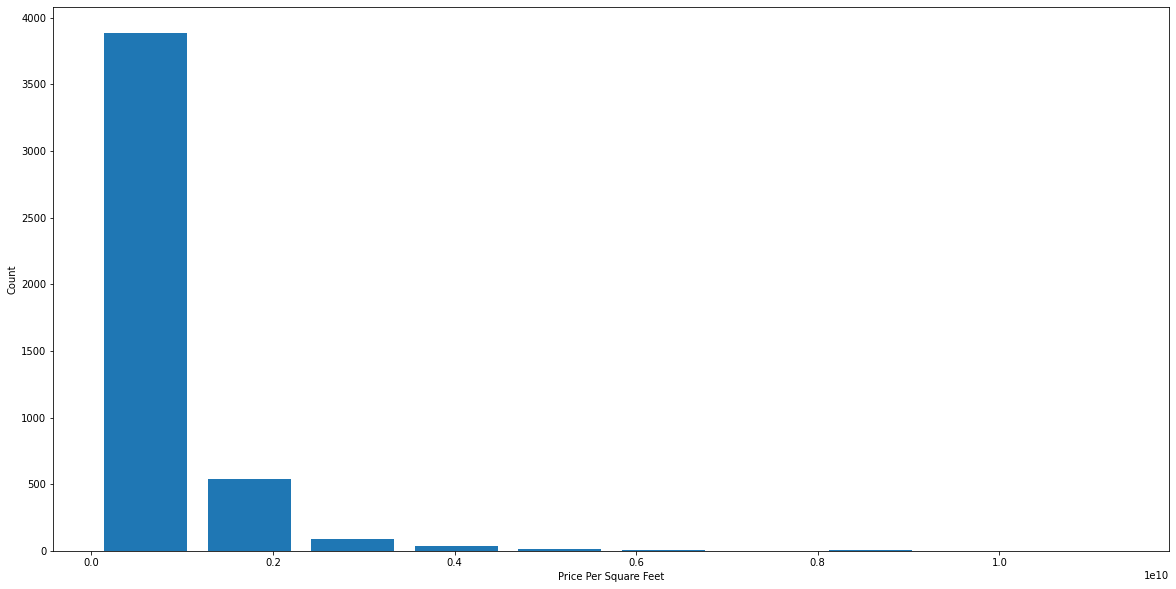

In [29]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [30]:
df4[df4.Gymnasium>=3]

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,price_per_sqft
40,21000000,1550,Alaknanda,3,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,1.354839e+09
41,18000000,1500,Alaknanda,3,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,1.200000e+09
42,17500000,1550,Alaknanda,3,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,1.129032e+09
43,19500000,1150,Alaknanda,3,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,1.695652e+09
44,20500000,1350,Alaknanda,3,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,1.518519e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,15000000,540,other,2,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,2.777778e+09
4572,2500000,540,other,2,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,4.629630e+08
4573,3000000,540,other,2,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,5.555556e+08
4574,2600000,415,other,1,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,6.265060e+08


# Build A Model


In [47]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [31]:
df4.shape

(4576, 41)

In [48]:
df4.replace(9,np.nan,inplace=True)
df4.dropna(axis=0,how="any",inplace=True)

In [50]:
le_location=LabelEncoder()
df4["Location"]=le_location.fit_transform(df4["Location"])


x1=df4.drop(["Price","MaintenanceStaff","SwimmingPool","LandscapedGardens","ShoppingMall","SportsFacility","ATM","ClubHouse","StaffQuarter","Cafeteria","MultipurposeRoom","WashingMachine","Wifi","BED","Microwave","DiningTable","Wardrobe","Sofa","Refrigerator","GolfCourse","TV"],axis=1,inplace=False)
x1=sm.add_constant(x1)
y1=np.log(df4["Price"])
model=sm.OLS(y1,x1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1729.
Date:                Sun, 18 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:32:48   Log-Likelihood:                 550.46
No. Observations:                1901   AIC:                            -1059.
Df Residuals:                    1880   BIC:                            -942.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.8893    

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


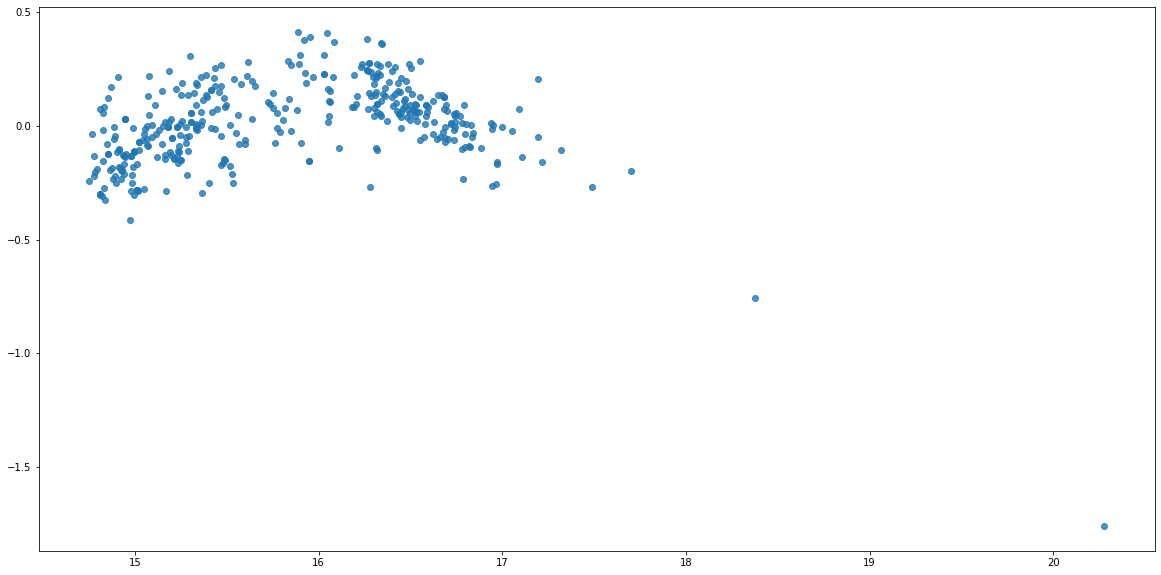

In [51]:
df4.drop(["MaintenanceStaff","SwimmingPool","LandscapedGardens","ShoppingMall","SportsFacility","ATM","ClubHouse","StaffQuarter","Cafeteria","MultipurposeRoom","WashingMachine","Wifi","BED","Microwave","DiningTable","Wardrobe","Sofa","Refrigerator","GolfCourse","TV"],axis=1,inplace=True)

x=df4.drop("Price",axis=1,inplace=False)
x=x.values
y=np.log(df4["Price"]).values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
lgr=LinearRegression(fit_intercept=True)
model_1=lgr.fit(x_train,y_train)
prediction=lgr.predict(x_test)
residual=y_test-prediction
sns.regplot(prediction,residual,fit_reg=False)

In [52]:
print(model_1.score(x_test,y_test))

0.9436872540056108


In [53]:
print(r2_score(y_test,prediction))

0.9436872540056108


In [54]:
print(np.sqrt(mean_squared_error(y_test,prediction)))

0.18754727382207587


# *Creating the Piclke File for the deployment*

In [58]:
import pickle
with open('Delhi_home_prices_model.pickle','wb') as f:
    pickle.dump(lgr,f)

# Export location and column information to a file that will be useful later on in our prediction application

In [59]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))